## 랜덤포레스트 개발

1. Random Forest Algorithm
2. Random Forest Scikit-Learn API
3. Random Forest for Classification
4. Random Forest for Regression
5. Random Forest Hyperparameters
6. Explore Number of Samples
7. Explore Number of Features
8. Explore Number of Trees
9. Explore Tree Depth
10. Common Questions

## 사이킷런 버전 확인

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.2


## 가상자료 생성

In [2]:
# make_classification 패키지 사용

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

In [8]:
X.shape, y.shape

((1000, 20), (1000,))

In [9]:
# 모델개발, 평가관련 패키지

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [12]:
# 모델 정의

In [13]:
model = RandomForestClassifier()

In [14]:
# 크로스 밸리데이션 설정

In [15]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [16]:
# 모델평가 척도 설정


In [17]:
n_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [21]:
import numpy as np
print(f"모델정확도는 {np.mean(n_score):.3f}이고, 편차는 {np.std(n_score): .3f}")

모델정확도는 0.900이고, 편차는  0.029


In [22]:
model.fit(X, y)

RandomForestClassifier()

In [23]:
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]

In [25]:
yhat = model.predict(row)

In [30]:
yhat[0]

0

In [31]:
from sklearn.datasets import make_regression

In [32]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
X.shape, y.shape

((1000, 20), (1000,))

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor()

In [37]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -75.702 (5.345)


In [38]:
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 139


In [39]:
#Random Forest Hyperparameters

In [40]:
'%.1f' % 0.1

'0.1'

>0.1 0.855 (0.027)
>0.2 0.875 (0.028)
>0.3 0.885 (0.030)
>0.4 0.888 (0.029)
>0.5 0.895 (0.026)
>0.6 0.897 (0.024)
>0.7 0.895 (0.027)
>0.8 0.907 (0.028)
>0.9 0.901 (0.022)
>1.0 0.904 (0.030)


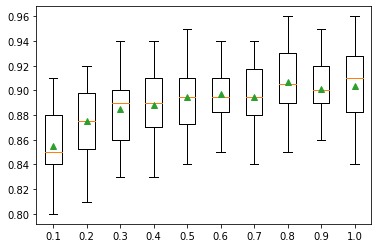

In [41]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.893 (0.027)
>2 0.898 (0.025)
>3 0.904 (0.023)
>4 0.902 (0.030)
>5 0.903 (0.027)
>6 0.899 (0.023)
>7 0.901 (0.024)


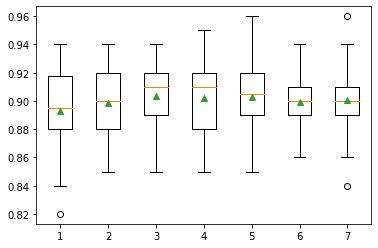

In [42]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.875 (0.028)
>50 0.893 (0.027)
>100 0.902 (0.023)
>500 0.908 (0.027)
>1000 0.909 (0.023)


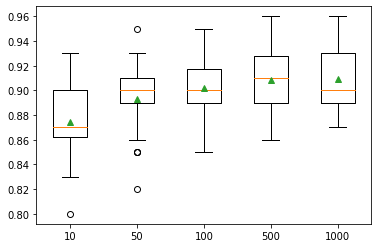

In [43]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.779 (0.042)
>2 0.811 (0.032)
>3 0.837 (0.031)
>4 0.855 (0.028)
>5 0.878 (0.026)
>6 0.880 (0.027)
>7 0.890 (0.023)
>None 0.904 (0.024)


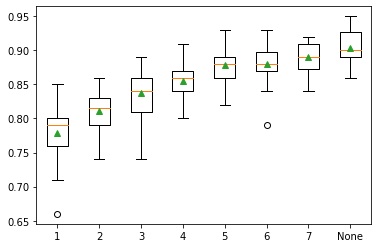

In [44]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()